## **Libraries**

In [ ]:
# Data manipulation and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis and modeling libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Machine learning and deep learning model libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, mean_squared_log_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
# Load dataset with preprocessed data
olist_df = pd.read_pickle('notebooks/datasets/processed_dataset.pkl')
olist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114422 entries, 0 to 114421
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  114422 non-null  object        
 1   order_purchase_timestamp  114422 non-null  datetime64[ns]
 2   datetime                  114422 non-null  datetime64[ns]
 3   diff_days                 114422 non-null  int64         
 4   weekly                    114422 non-null  UInt32        
 5   product_id                114422 non-null  object        
 6   seller_id                 114422 non-null  object        
 7   price                     114422 non-null  float64       
 8   freight_value             114422 non-null  float64       
 9   product_category_name     114422 non-null  object        
 10  seller_zip_code_prefix    114422 non-null  int64         
 11  seller_city               114422 non-null  object        
 12  se

## **Product Price Prediction Models**

In [ ]:
# Extraction of numerical values
df_numeric = olist_df.select_dtypes(include=['int', 'float'])

* Scatter plot matrix

In [ ]:
sns.pairplot(df_numeric)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

* Covariance matrix and heat map

In [ ]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df_numeric)

In [ ]:
covariance_matriz = np.cov(scaled.T)

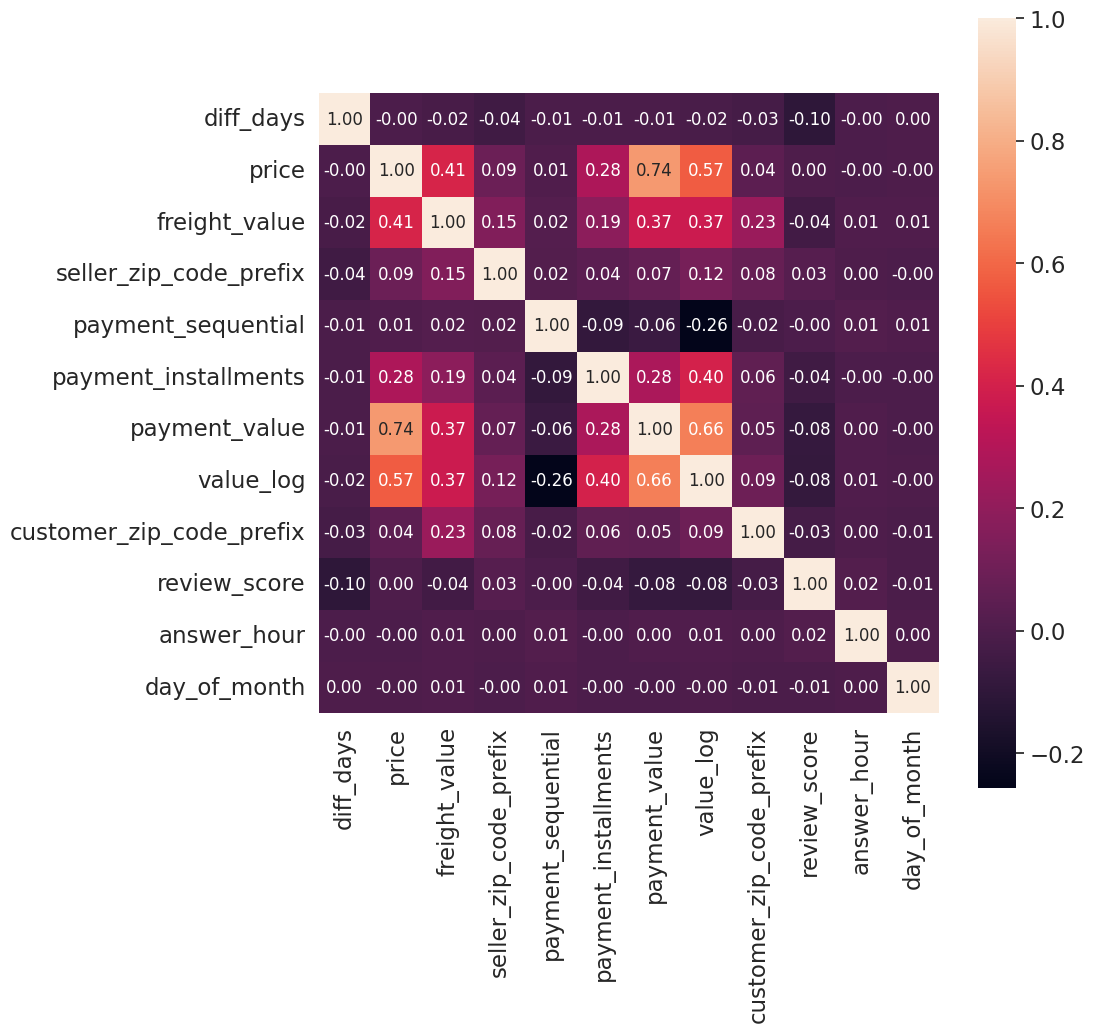

In [ ]:
plt.figure(figsize = (10,10))
sns.set(font_scale = 1.5)
hm = sns.heatmap(covariance_matriz,
                 cbar = True,
                 annot = True,
                 square = True,
                 fmt = '.2f',
                 annot_kws = {'size':12},
                 yticklabels = ['diff_days', 'price', 'freight_value', 'seller_zip_code_prefix', 'payment_sequential', 'payment_installments', 'payment_value', 'value_log', 'customer_zip_code_prefix', 'review_score', 'answer_hour', 'day_of_month'],
                 xticklabels = ['diff_days', 'price', 'freight_value', 'seller_zip_code_prefix', 'payment_sequential', 'payment_installments', 'payment_value', 'value_log', 'customer_zip_code_prefix', 'review_score', 'answer_hour', 'day_of_month'])

* Data transformation and scaling

In [ ]:
X = df_numeric.drop(['payment_value'], axis=1)
y = df_numeric['payment_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Neural Network 'payment_value'

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer=Adam(), loss='mean_squared_error')

history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

predictions = model.predict(X_test_scaled).flatten()

Epoch 1/50
2289/2289 [==============================] - 6s 3ms/step - loss: 29044.4824 - val_loss: 7883.0625
Epoch 2/50
2289/2289 [==============================] - 6s 3ms/step - loss: 15042.7412 - val_loss: 5781.8218
Epoch 3/50
2289/2289 [==============================] - 6s 3ms/step - loss: 12684.5684 - val_loss: 4348.7236
Epoch 4/50
2289/2289 [==============================] - 6s 2ms/step - loss: 10822.9365 - val_loss: 3277.8738
Epoch 5/50
2289/2289 [==============================] - 6s 3ms/step - loss: 9106.5068 - val_loss: 2385.4233
Epoch 6/50
2289/2289 [==============================] - 5s 2ms/step - loss: 7778.7222 - val_loss: 1867.7634
Epoch 7/50
2289/2289 [==============================] - 6s 3ms/step - loss: 6757.4146 - val_loss: 2111.6458
Epoch 8/50
2289/2289 [==============================] - 6s 2ms/step - loss: 5920.7466 - val_loss: 1091.1626
Epoch 9/50
2289/2289 [==============================] - 7s 3ms/step - loss: 5230.0996 - val_loss: 1028.7332
Epoch 10/50
2289/2289 [=

In [ ]:
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

print("Mean square error (MSE):", mse)
print("Mean absolute error (MAE):", mae)
print("Determination coefficient (R^2):", r2)
print("Mean absolute percentage error (MAPE):", mape)

Mean square error (MSE): 365.83851451672484
Mean absolute error (MAE): 2.441834159382676
Determination coefficient (R^2): 0.9957425443313143
Mean absolute percentage error (MAPE): inf


* Graph of the evolution of the losses during training over the epochs, both in the training set and in the validation set.

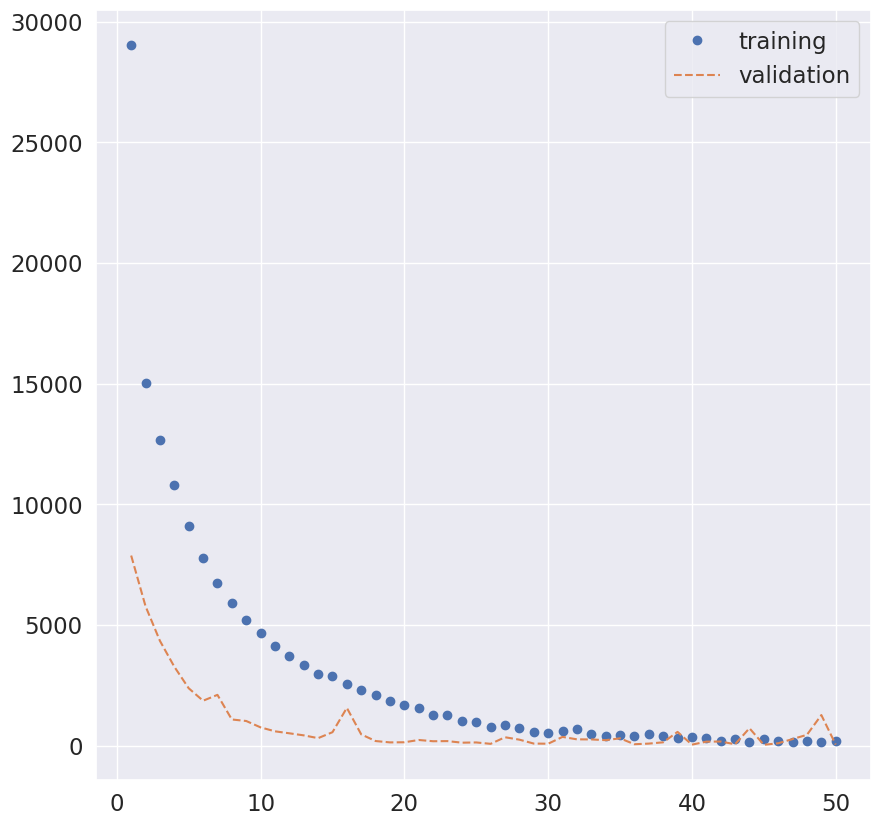

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

fig =plt.figure(figsize = (10,10))
epoch = range(1, len(loss_values) + 1)
plt.plot(epoch, loss_values, 'o', label = 'training')
plt.plot(epoch, val_loss_values, '--', label = 'validation')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(X_test_scaled).flatten()

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions) * 100
rmse = np.sqrt(mse)
mpe = np.mean((y_test - predictions) / y_test) * 100

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')
print(f'MAPE: {mape}%')
print(f'RMSE: {rmse}')
print(f'MPE: {mpe}%')

716/716 [==============================] - 1s 2ms/step
MSE: 365.83851451672484
MAE: 2.441834159382676
R^2: 0.9957425443313143
MAPE: 355502653918820.0%
RMSE: 19.126905513352778
MPE: -inf%


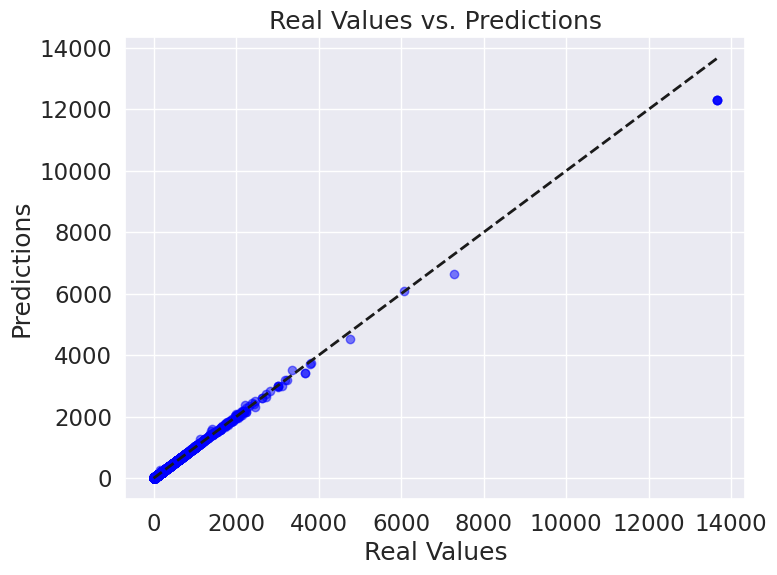

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal reference line
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.title('Real Values vs. Predictions')
plt.show()

#### Test using principal component analysis (PCA)

In [ ]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matriz)

In [ ]:
variance_explained = []
for i in eigen_values:
  variance_explained.append((i/sum(eigen_values))*100)

In [ ]:
print(variance_explained)

[23.7954586912964, 1.9458104212526002, 2.914553013503039, 5.144454121026679, 9.771189017013878, 6.7632014220434575, 9.102452421364745, 7.42658984912099, 7.712408217798786, 8.791535198017446, 8.312216372609901, 8.320131254952088]


In [ ]:
pca = PCA(n_components=2)
pca.fit(scaled)
pca.explained_variance_ratio_

array([0.23795459, 0.09771189])

<ipython-input-29-9562fa7323df>:7: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  jointplot = sns.jointplot(x='pca_1', y='pca_2', data=olist_df, hue='product_category_name', height=8, ax=ax)


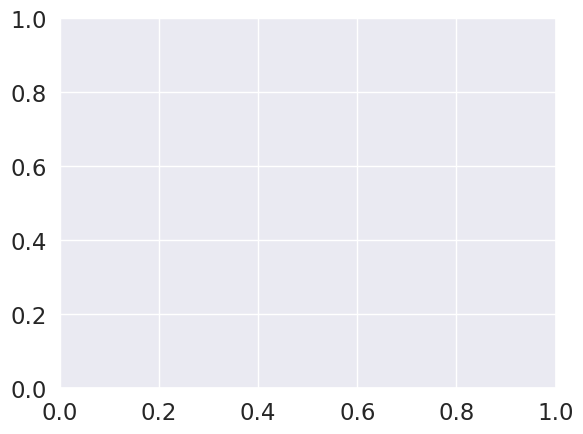

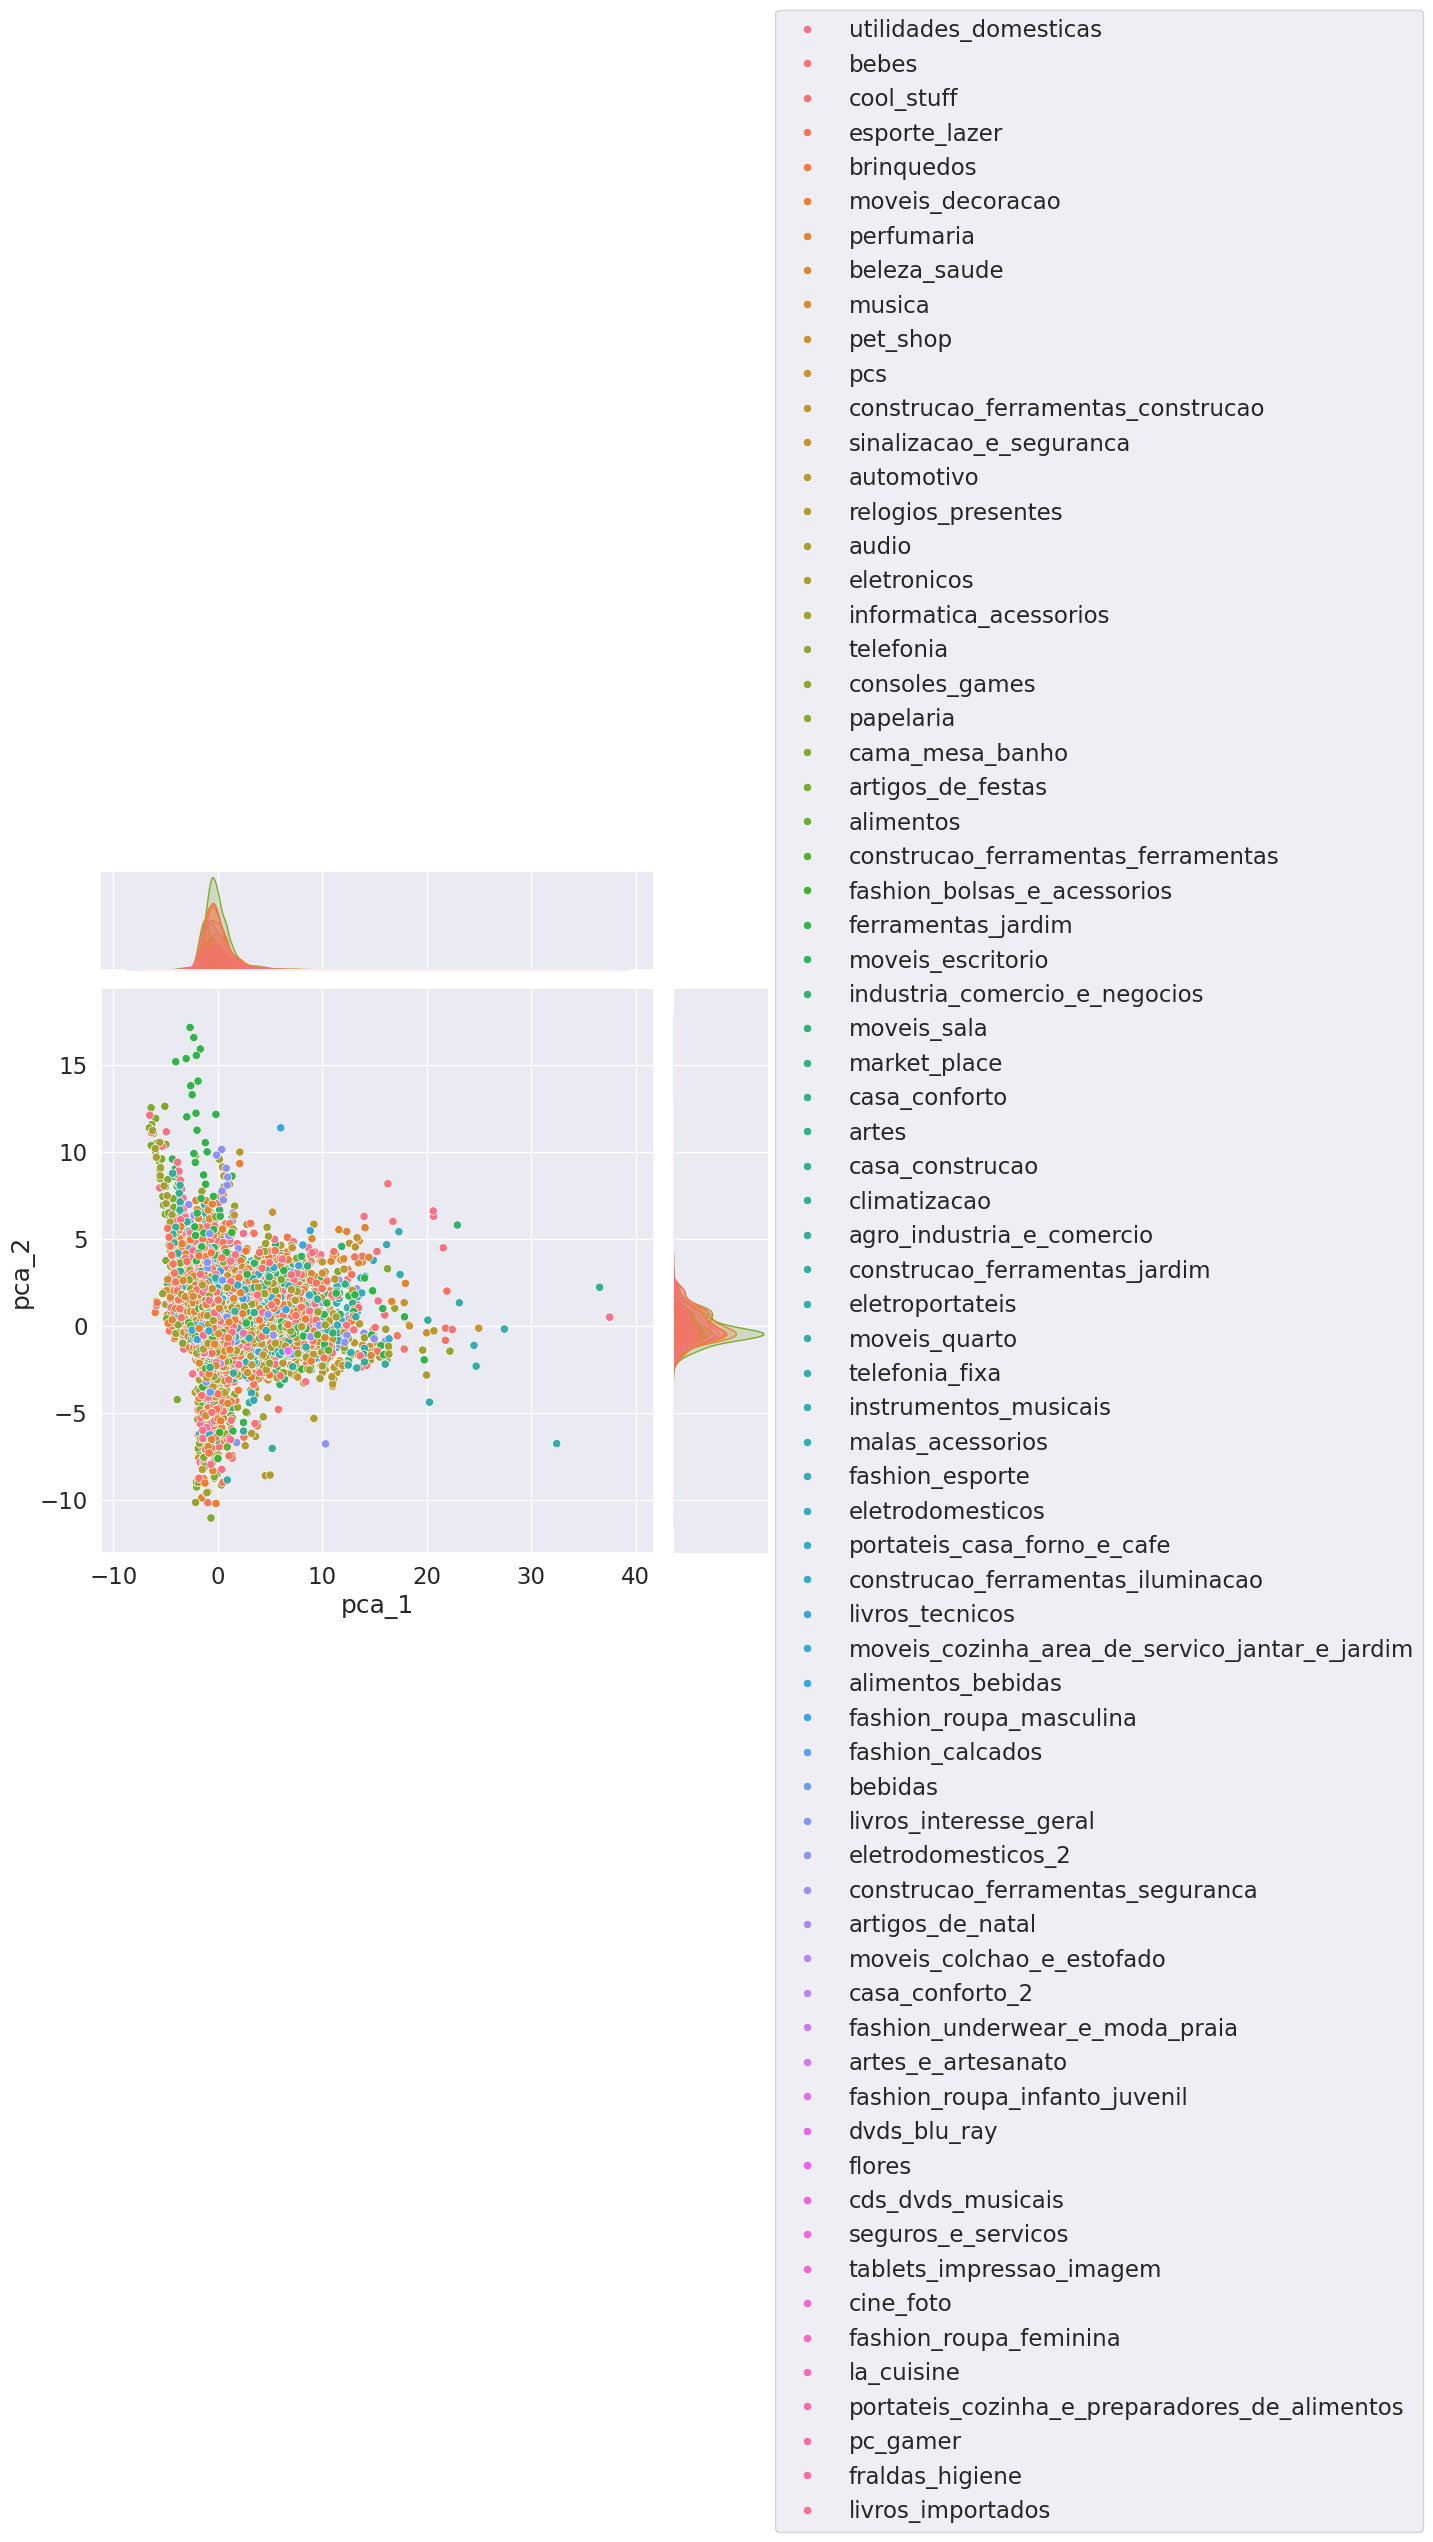

In [ ]:
reduced_scaled = pca.transform(scaled)
olist_df['pca_1'] = reduced_scaled[:, 0]
olist_df['pca_2'] = reduced_scaled[:, 1]

fig, ax = plt.subplots()

jointplot = sns.jointplot(x='pca_1', y='pca_2', data=olist_df, hue='product_category_name', height=8, ax=ax)
jointplot.ax_joint.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.show()

In [ ]:
X = reduced_scaled
y = olist_df['payment_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer=Adam(), loss='mean_squared_error')

history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

predictions = model.predict(X_test_scaled).flatten()

Epoch 1/50
2289/2289 [==============================] - 11s 4ms/step - loss: 26730.3633 - val_loss: 7640.1973
Epoch 2/50
2289/2289 [==============================] - 5s 2ms/step - loss: 10724.4268 - val_loss: 7450.5552
Epoch 3/50
2289/2289 [==============================] - 6s 3ms/step - loss: 10199.3994 - val_loss: 6882.5259
Epoch 4/50
2289/2289 [==============================] - 5s 2ms/step - loss: 9919.0898 - val_loss: 6791.5742
Epoch 5/50
2289/2289 [==============================] - 6s 2ms/step - loss: 9748.4365 - val_loss: 6766.5239
Epoch 6/50
2289/2289 [==============================] - 6s 3ms/step - loss: 9645.4941 - val_loss: 6757.5708
Epoch 7/50
2289/2289 [==============================] - 6s 2ms/step - loss: 9508.3730 - val_loss: 6710.7861
Epoch 8/50
2289/2289 [==============================] - 6s 3ms/step - loss: 9353.4697 - val_loss: 6721.8672
Epoch 9/50
2289/2289 [==============================] - 5s 2ms/step - loss: 9173.9639 - val_loss: 6635.4873
Epoch 10/50
2289/2289 [=

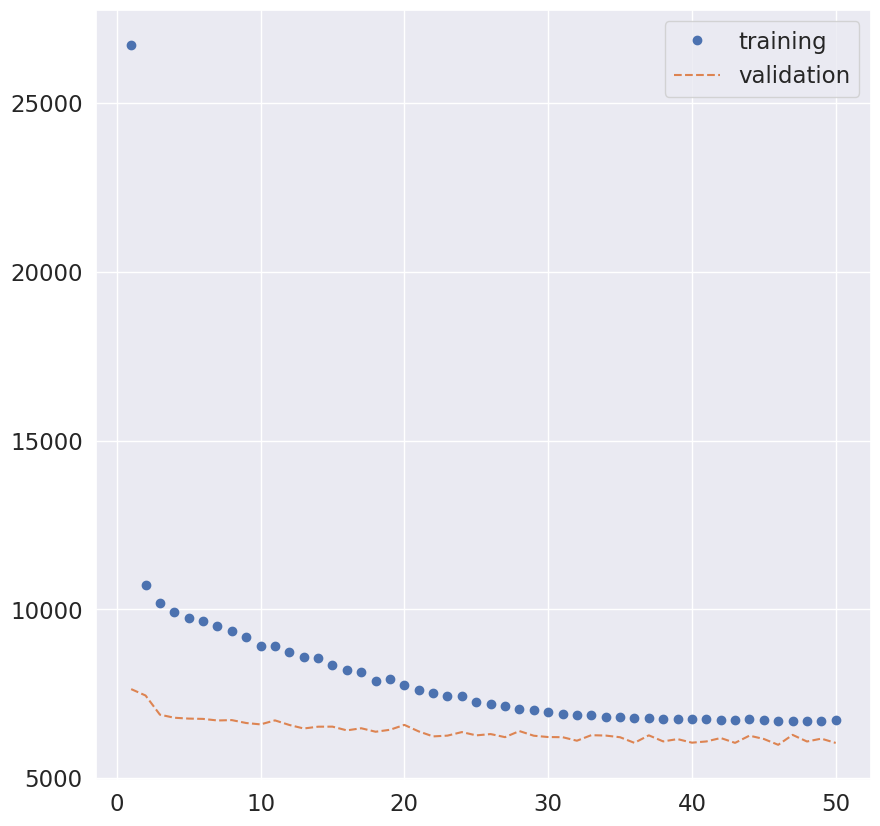

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

fig =plt.figure(figsize = (10,10))
epoch = range(1, len(loss_values) + 1)
plt.plot(epoch, loss_values, 'o', label = 'training')
plt.plot(epoch, val_loss_values, '--', label = 'validation')
plt.legend()
plt.show()

In [ ]:
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

print("Error cuadrático medio (MSE):", mse)
print("Error absoluto medio (MAE):", mae)
print("Coeficiente de determinación (R^2):", r2)
print("Error porcentual absoluto medio (MAPE):", mape)

Error cuadrático medio (MSE): 6365.608685189722
Error absoluto medio (MAE): 37.17867787262527
Coeficiente de determinación (R^2): 0.9259200556912457
Error porcentual absoluto medio (MAPE): inf


In [ ]:
predictions = model.predict(X_test_scaled).flatten()

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions) * 100
rmse = np.sqrt(mse)
mpe = np.mean((y_test - predictions) / y_test) * 100

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')
print(f'MAPE: {mape}%')
print(f'RMSE: {rmse}')
print(f'MPE: {mpe}%')

716/716 [==============================] - 1s 2ms/step
MSE: 6365.608685189722
MAE: 37.17867787262527
R^2: 0.9259200556912457
MAPE: 135259745527135.69%
RMSE: 79.78476474358824
MPE: -inf%


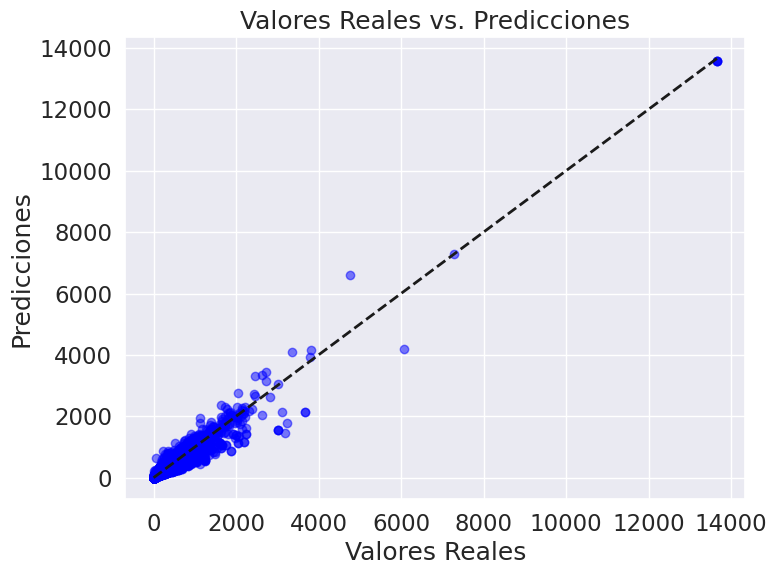

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones')
plt.show()

> As we observe in the comparison graph of validation and training in each epoch, there is overfitting and greater dispersion in both initial values and outliers. Therefore the use of PCA is not the most appropriate for this case.

### Xgboost

In [ ]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train_scaled, y_train)
xgb_predicciones = xgb_model.predict(X_test_scaled)

mse_xgb = mean_squared_error(y_test, xgb_predicciones)
mae_xgb = mean_absolute_error(y_test, xgb_predicciones)
r2_xgb = r2_score(y_test, xgb_predicciones)

print(f"MSE: {mse_xgb}")
print(f"MAE: {mae_xgb}")
print(f"R^2: {r2_xgb}")

MSE: 1301.6301381797343
MAE: 2.681789563566153
R^2: 0.9848522438441286


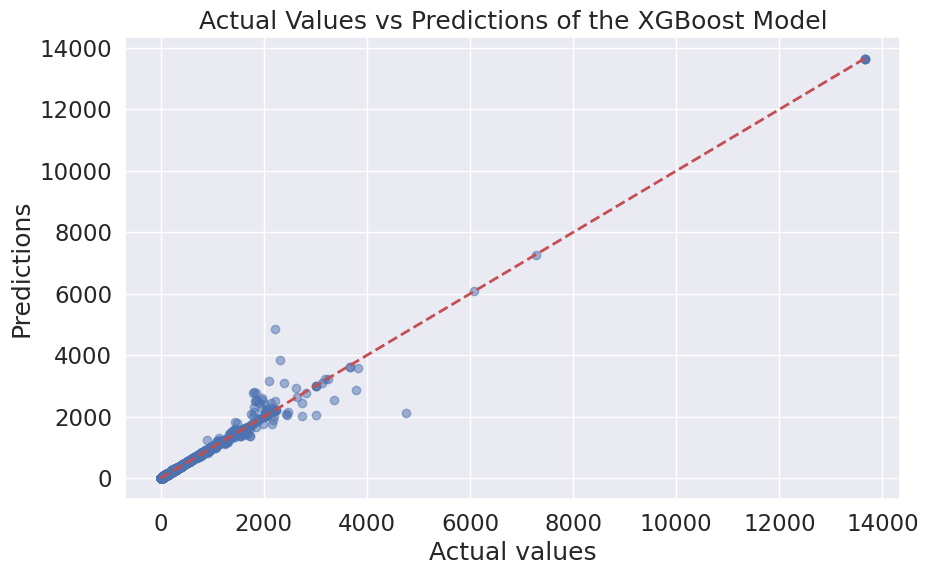

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, xgb_predicciones, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.title('Actual Values vs Predictions of the XGBoost Model')
plt.xlabel('Actual values')
plt.ylabel('Predictions')
plt.grid(True)
plt.show()

### Linear regression

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_predicciones = lr_model.predict(X_test_scaled)

mse_lr = mean_squared_error(y_test, lr_predicciones)
mae_lr = mean_absolute_error(y_test, lr_predicciones)
r2_lr = r2_score(y_test, lr_predicciones)

print(f"MSE: {mse_lr}")
print(f"MAE: {mae_lr}")
print(f"R^2: {r2_lr}")

MSE: 39328.320280702836
MAE: 59.21784941249539
R^2: 0.5423156024450964


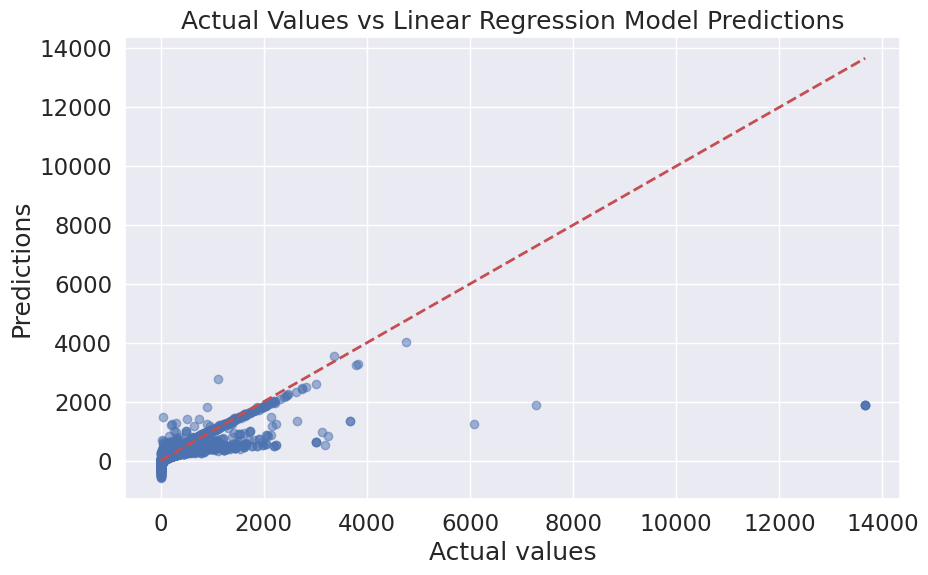

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_predicciones, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.title('Actual Values vs Linear Regression Model Predictions')
plt.xlabel('Actual values')
plt.ylabel('Predictions')
plt.grid(True)
plt.show()

### Random forest Regressor

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_predicciones = rf_model.predict(X_test_scaled)

mse_rf = mean_squared_error(y_test, rf_predicciones)
mae_rf = mean_absolute_error(y_test, rf_predicciones)
r2_rf = r2_score(y_test, rf_predicciones)

print(f"MSE: {mse_rf}")
print(f"MAE: {mae_rf}")
print(f"R^2: {r2_rf}")

MSE: 7.153042098612019
MAE: 0.0650555822591481
R^2: 0.9999167562779132


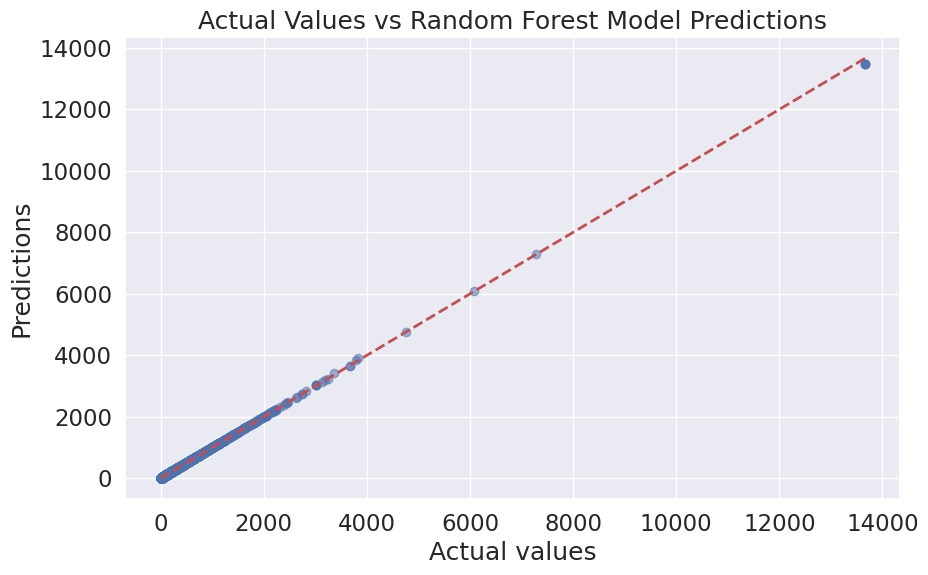

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predicciones, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.title('Actual Values vs Random Forest Model Predictions')
plt.xlabel('Actual values')
plt.ylabel('Predictions')
plt.grid(True)
plt.show()

### Final results

In [ ]:
data = {
    'Models': ['XGBoost', 'Linear regression', 'Random Forest Regressor','Neural networks' ],
    'MSE': [mse_xgb, mse_lr,mse_rf,mse],
    'MAE': [mae_xgb, mae_lr,mae_rf,mae],
    'R^2': [r2_xgb, r2_lr,r2_rf,r2]
}

df_metricas = pd.DataFrame(data)

df_metricas

,Models,MSE,MAE,R^2
0,XGBoost,1301.630138,2.681790,0.984852
1,Linear regression,39328.320281,59.217849,0.542316
2,Random Forest Regressor,7.153042,0.065056,0.999917
3,Neural networks,365.838515,2.441834,0.995743


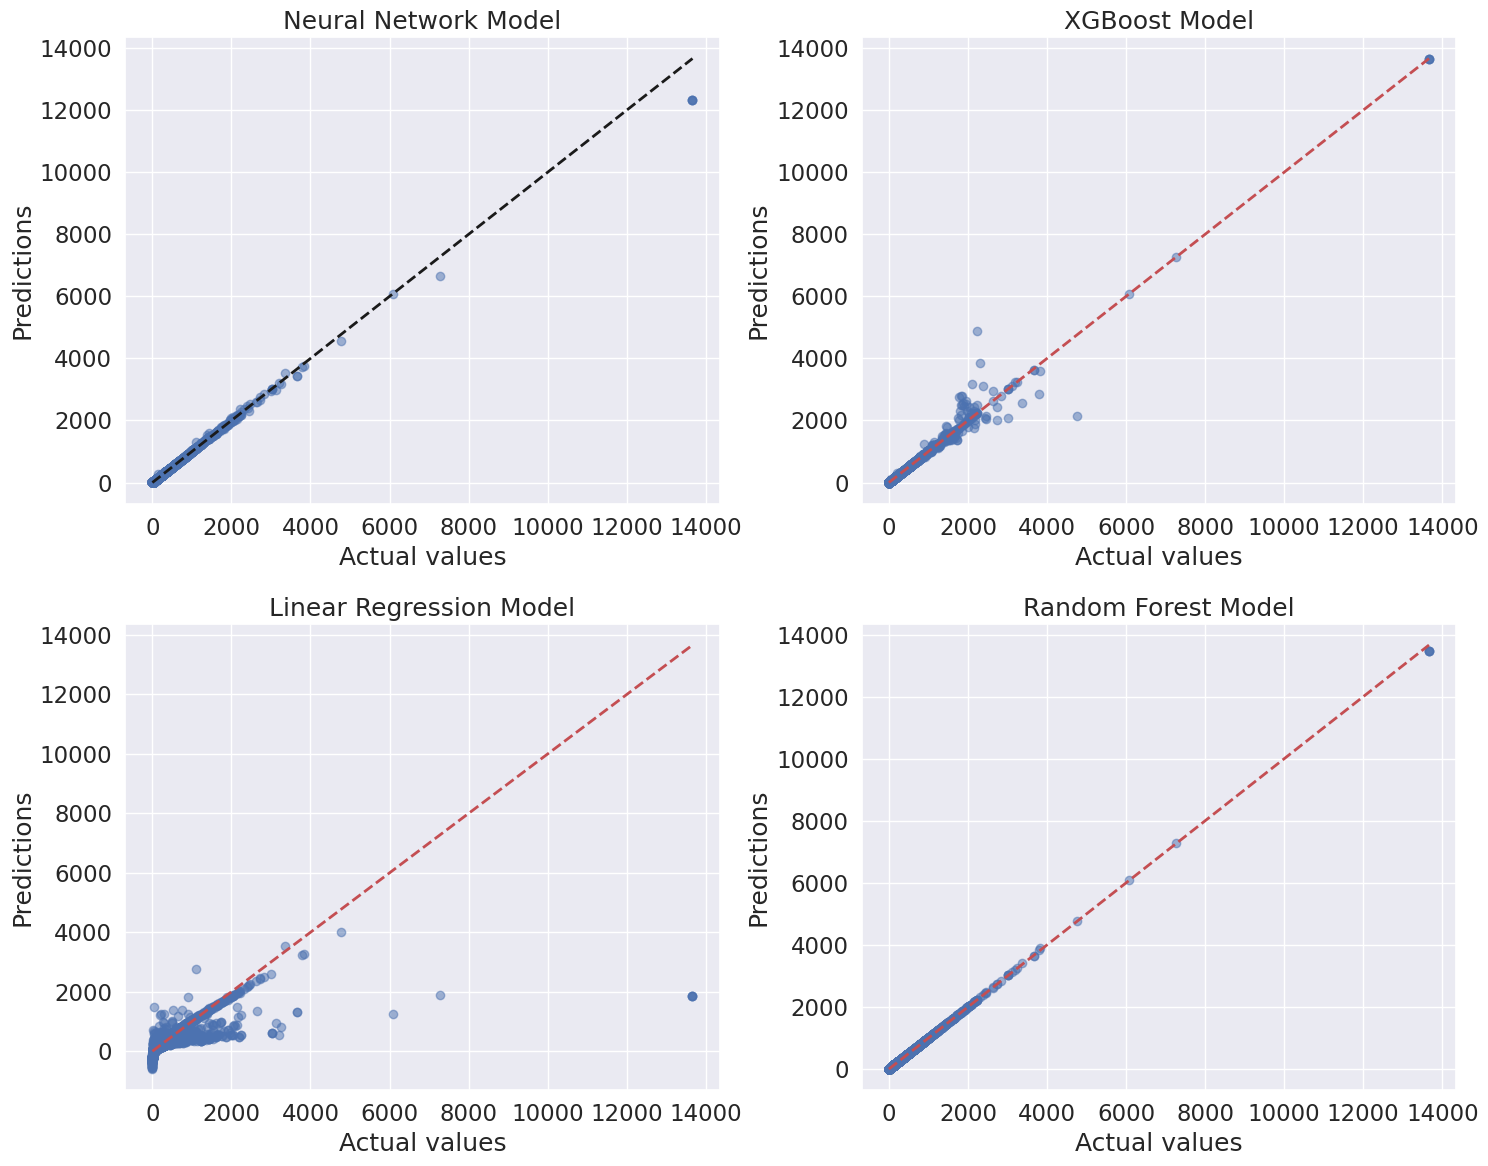

In [ ]:
# All graphics
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

axs[0, 0].scatter(y_test, predictions, alpha=0.5)
axs[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Línea diagonal de referencia
axs[0, 0].set_title('Neural Network Model')
axs[0, 0].set_xlabel('Actual values')
axs[0, 0].set_ylabel('Predictions')
axs[0, 0].grid(True)

axs[0, 1].scatter(y_test, xgb_predicciones, alpha=0.5)
axs[0, 1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
axs[0, 1].set_title('XGBoost Model')
axs[0, 1].set_xlabel('Actual values')
axs[0, 1].set_ylabel('Predictions')
axs[0, 1].grid(True)

axs[1, 0].scatter(y_test, lr_predicciones, alpha=0.5)
axs[1, 0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
axs[1, 0].set_title('Linear Regression Model')
axs[1, 0].set_xlabel('Actual values')
axs[1, 0].set_ylabel('Predictions')
axs[1, 0].grid(True)

axs[1, 1].scatter(y_test, rf_predicciones, alpha=0.5)
axs[1, 1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
axs[1, 1].set_title('Random Forest Model')
axs[1, 1].set_xlabel('Actual values')
axs[1, 1].set_ylabel('Predictions')
axs[1, 1].grid(True)

plt.tight_layout()

plt.show()

We observed that:

* The random forest model could be overfitting the data since it compresses it too much along its straight line. But it could be an option to consider.

* The XGBOOST model has a significant dispersion around R$2000 and handles the rest of the data excellently.

* The neural network model has a very good understanding of the data and patterns, so the data is dispersed very close to the line of predicted values, which makes it seem in principle to be the best model that will understand new data.

As a final conclusion we can say that we have 3 very good and efficient models that understand how the price behaves, with neural networks being the best option to consider due to their good metrics and development.
In the case of wanting a super efficient model without losing so much prediction value, we have the XGBOOST.